In [57]:
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [58]:
list_files = sorted(os.listdir('Data/'))
list_files = [file for file in list_files if '2022' in file]
def sum_col(col_name):
    result = []
    for file_name in list_files:
        df = pd.read_csv('Data/'+file_name,encoding='utf-8',sep=';')
        df = df.fillna(0)
        result.append(df[col_name].sum()/1000)
    return result
new_cases = sum_col('New Cases')
active_cases = sum_col('Active Cases')

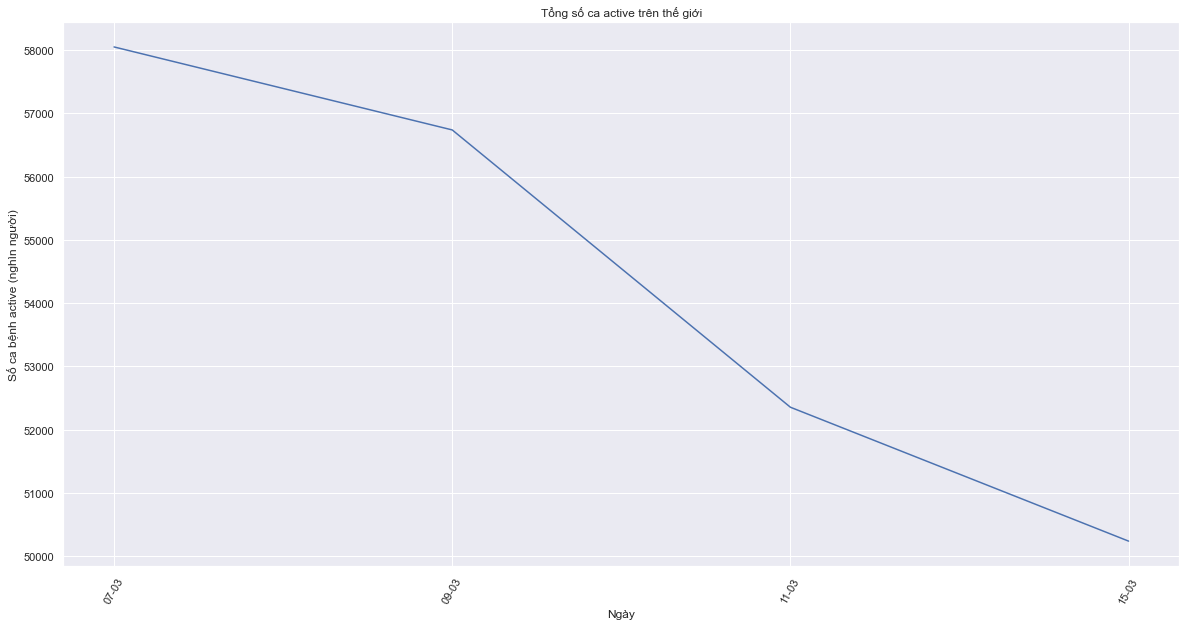

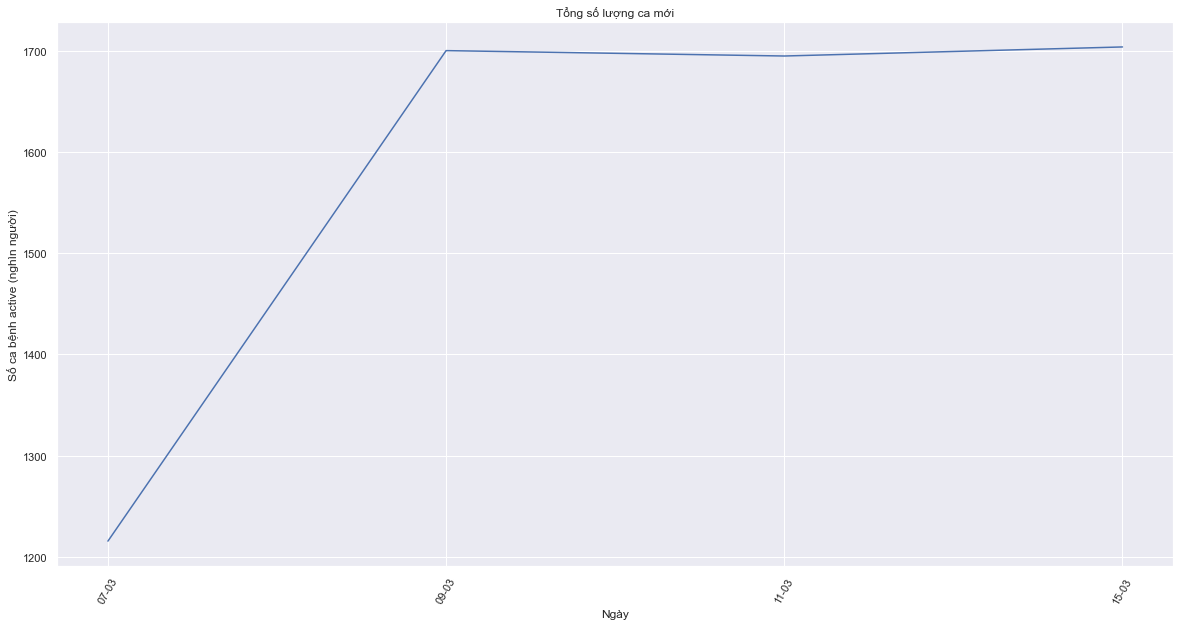

In [59]:
list_files = sorted(os.listdir('Data/'))
list_files = [file for file in list_files if '2022' in file]

periods =  [datetime.strptime(x.split('.')[0],'%Y-%m-%d') for x in list_files]
periods = [x.strftime('%d-%m') for x in periods]

plt.plot(periods,active_cases)
plt.ylabel('Số ca bệnh active (nghìn người)')
plt.xlabel('Ngày')
plt.title('Tổng số ca active trên thế giới')
plt.xticks(rotation=60)
plt.show()

plt.title('Tổng số lượng ca mới')
plt.xticks(rotation=60)
plt.ylabel('Số ca bệnh active (nghìn người)')
plt.xlabel('Ngày')
plt.plot(periods, new_cases)
plt.show()

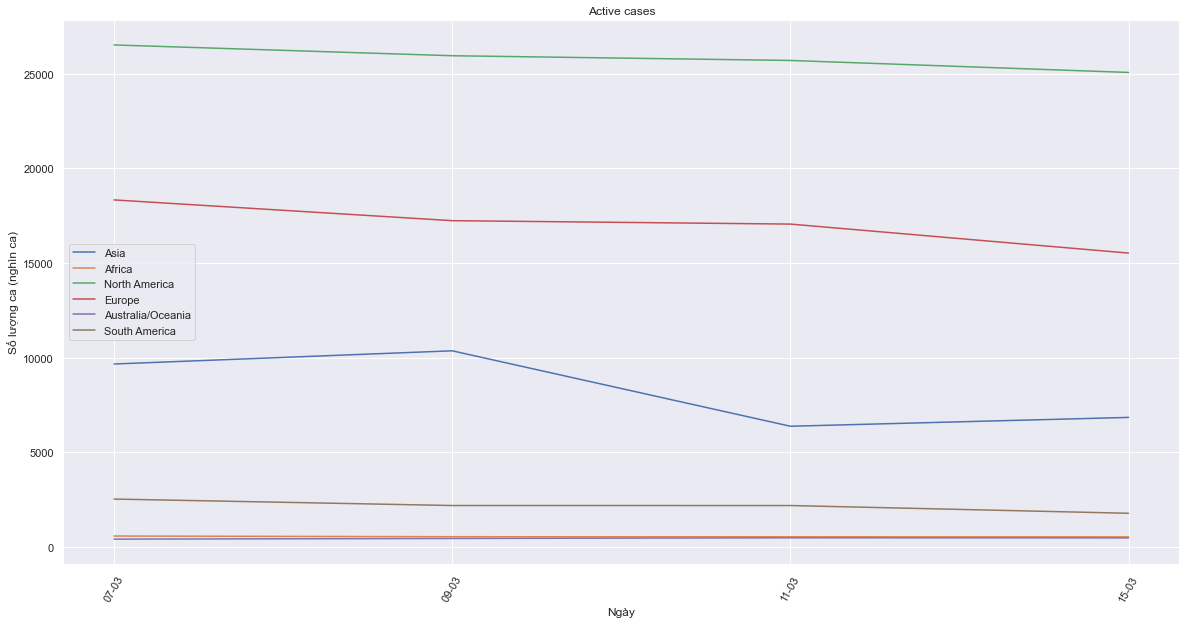

,Region,07-03,09-03,11-03,15-03
0,Asia,"9,667","10,363","6,379","6,846"
1,Africa,580,544,540,536
2,North America,"26,520","25,951","25,701","25,067"
3,Europe,"18,334","17,238","17,058","15,526"
4,Australia/Oceania,416,451,486,480
5,South America,"2,532","2,191","2,190","1,782"


In [60]:
periods =  [datetime.strptime(x.split('.')[0],'%Y-%m-%d') for x in list_files]
periods = [x.strftime('%d-%m') for x in periods]

def sum_col_region(col_name,region):
    result = []
    for file_name in list_files:
        df = pd.read_csv('Data/'+file_name,encoding='utf-8',sep=';')
        df['Continent'] = df['Continent'].fillna('Unknow')
        df = df.fillna(0)
        Total = df[df['Continent']==region][col_name].sum()/1000
        result.append(Total)
    return result

file_name = 'Data/'+list_files[-1]
df = pd.read_csv(file_name,encoding='utf-8',sep=';')
df['Continent'] = df['Continent'].fillna('Unknow')
regions = set(df['Continent'])
dic_region = {}

data = pd.DataFrame([],columns = ['Region']+periods)

for region in regions:
    if(region in ['Unknow']):
        continue
    dic_region[region] = sum_col_region('Active Cases',region)
    data.loc[len(data)] = [region]+dic_region[region]
    plt.plot(periods,dic_region[region],label=region)
plt.legend(loc='best')
plt.title("Active cases")
plt.ylabel("Số lượng ca (nghìn ca)")
plt.xlabel('Ngày')
plt.xticks(rotation=60)
plt.savefig('RegionActive.jpg')
plt.show()

pd.options.display.float_format = '{:,.0f}'.format
data

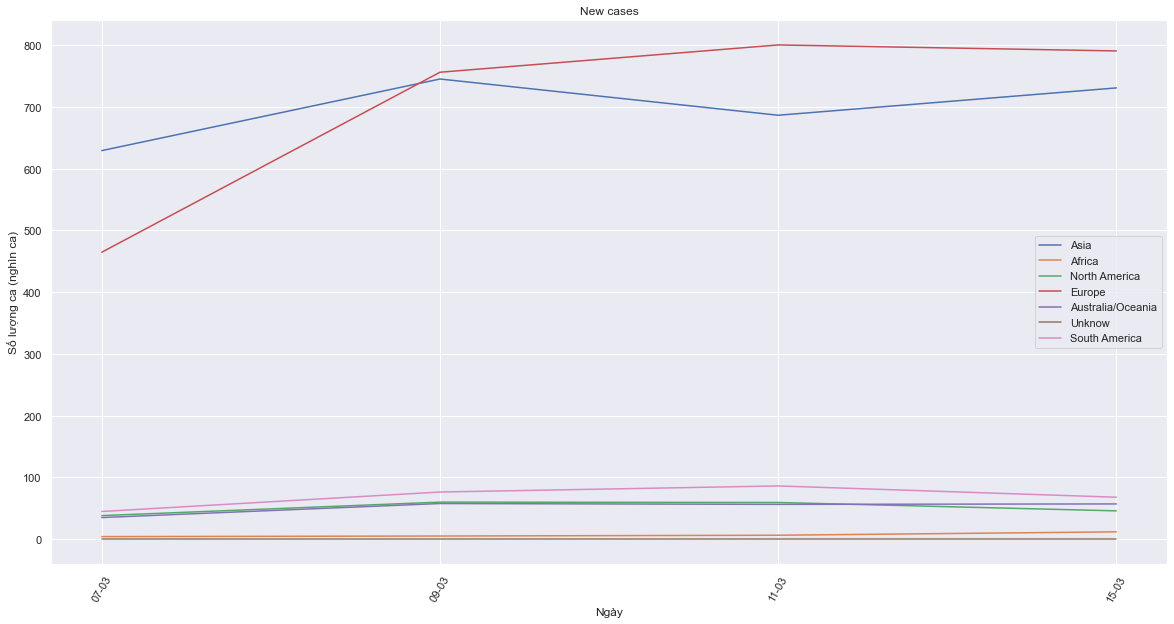

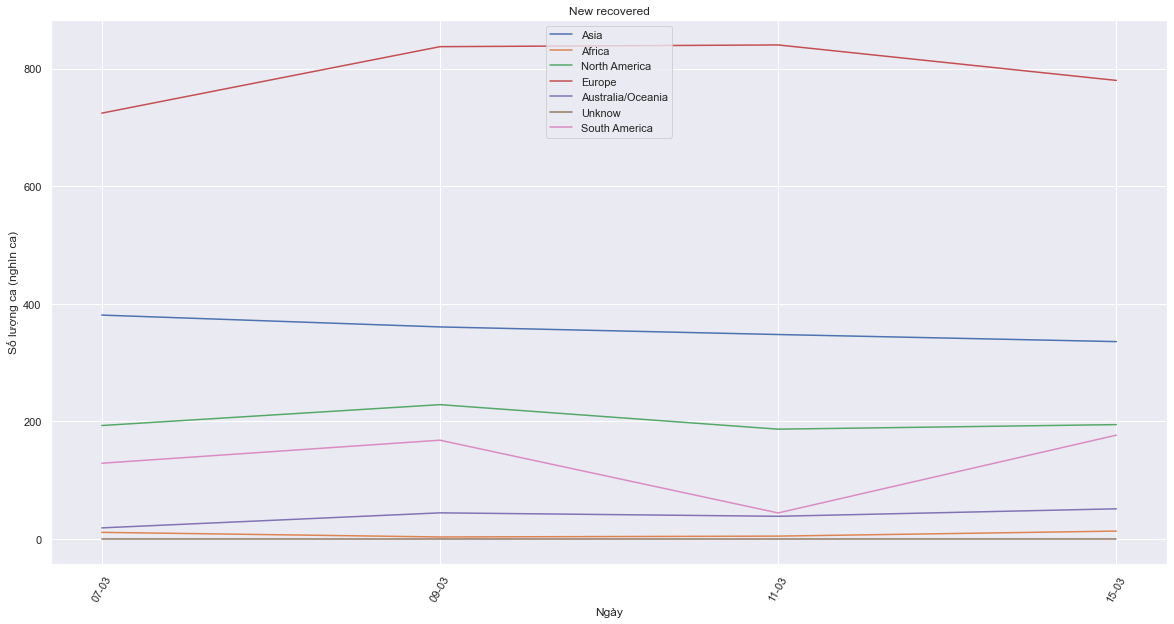

In [61]:
for region in regions:
    dic_region[region] = sum_col_region('New Cases',region)
    plt.plot(periods,dic_region[region],label=region)
plt.legend(loc='best')
plt.ylabel("Số lượng ca (nghìn ca)")
plt.xlabel('Ngày')
plt.xticks(rotation=60)
plt.title("New cases")
plt.show()
for region in regions:
    dic_region[region] = sum_col_region('New Recovered',region)
    plt.plot(periods,dic_region[region],label=region)
plt.legend(loc='best')
plt.ylabel("Số lượng ca (nghìn ca)")
plt.xlabel('Ngày')
plt.title("New recovered")
plt.xticks(rotation=60)
plt.show()

In [62]:
data = pd.read_csv('Data/'+list_files[-1],sep=';')

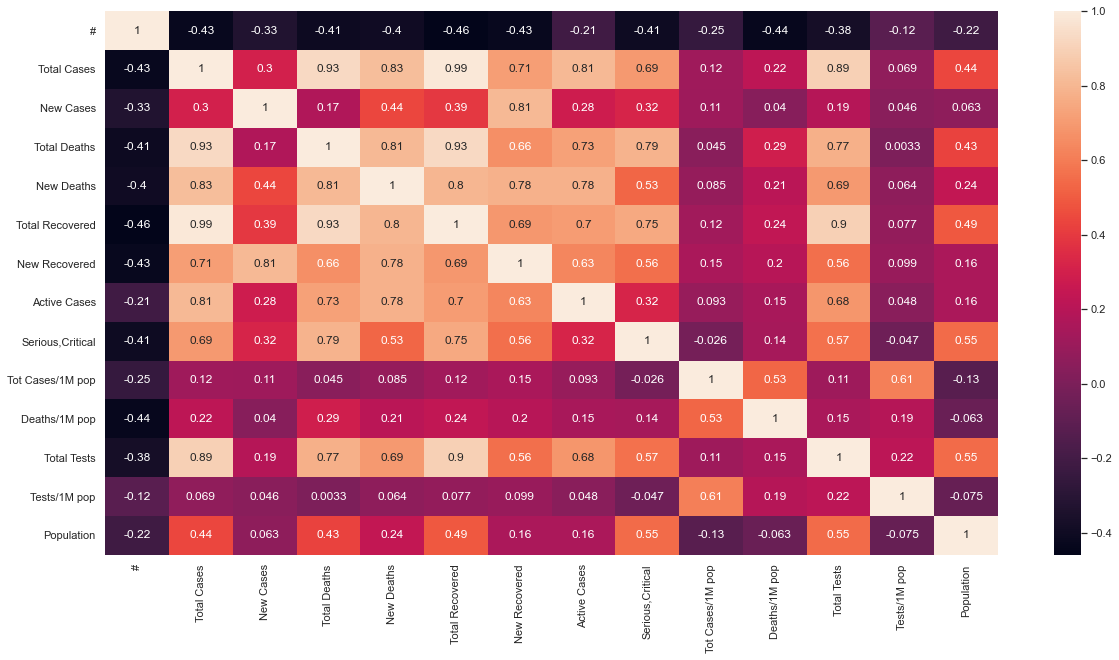

In [63]:
sns.heatmap(data.corr(),annot=True)
sns.set(rc={'figure.figsize':(20,10)})

Index(['#', 'Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests',
       'Tests/1M pop', 'Population', 'Continent'],
      dtype='object')


<BarContainer object of 6 artists>

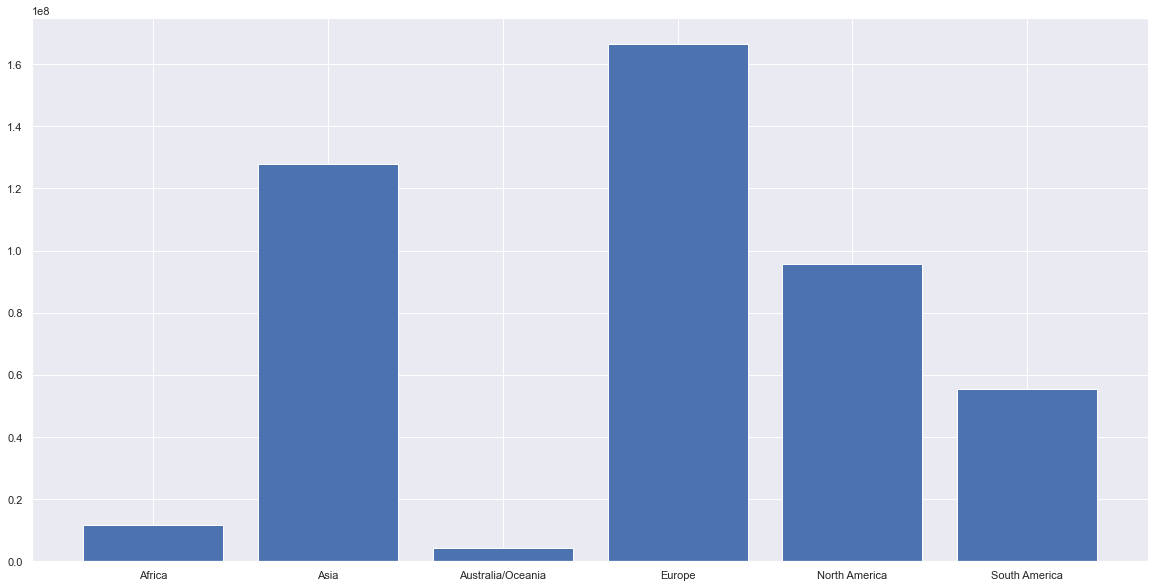

In [64]:
print(data.keys())
x = data.groupby(['Continent'])['Total Cases'].sum()
plt.bar(x.keys(), x)

In [66]:
models = smf.ols("Q('Serious,Critical')~Q('Population')",data=data).fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('Serious,Critical')   R-squared:                       0.298
Model:                               OLS   Adj. R-squared:                  0.295
Method:                    Least Squares   F-statistic:                     95.69
Date:                   Thu, 17 Mar 2022   Prob (F-statistic):           4.68e-19
Time:                           18:49:40   Log-Likelihood:                -1850.9
No. Observations:                    227   AIC:                             3706.
Df Residuals:                        225   BIC:                             3713.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         146.5806     57.816      2.535      0.012      32.651     260.510
Q('Population')  3.966e-06   4.05e-07      9.782      0.000    3.17e-06    4.76e-06
==============================================================================
Omnibus:                      201.777   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14295.410
Skew:                           2.864   Prob(JB):                         0.00
Kurtosis:                      41.453   Cond. No.                     1.47e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
models = smf.ols("Q('Total Deaths')~Q('Total Cases')",data=data).fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q('Total Deaths')   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     1364.
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           1.80e-97
Time:                        18:51:53   Log-Likelihood:                -2702.1
No. Observations:                 227   AIC:                             5408.
Df Residuals:                     225   BIC:                             5415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1263.4753   2482.361      0.509      0.611   -3628.175    6155.125
Q('Total Cases')     0.0125      0.000     36.931      0.000       0.012       0.013
==============================================================================
Omnibus:                      230.170   Durbin-Watson:                   2.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9677.180
Skew:                           3.844   Prob(JB):                         0.00
Kurtosis:                      34.049   Cond. No.                     7.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
models = smf.ols("Q('Serious,Critical')~Q('Total Cases')",data=data).fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('Serious,Critical')   R-squared:                       0.481
Model:                               OLS   Adj. R-squared:                  0.479
Method:                    Least Squares   F-statistic:                     208.9
Date:                   Thu, 17 Mar 2022   Prob (F-statistic):           6.19e-34
Time:                           19:13:13   Log-Likelihood:                -1816.6
No. Observations:                    227   AIC:                             3637.
Df Residuals:                        225   BIC:                             3644.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           82.6718     50.183      1.647      0.101     -16.217     181.561
Q('Total Cases')   9.92e-05   6.86e-06     14.455      0.000    8.57e-05       0.000
==============================================================================
Omnibus:                      213.336   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9645.323
Skew:                           3.347   Prob(JB):                         0.00
Kurtosis:                      34.224   Cond. No.                     7.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
models = smf.ols("Q('Serious,Critical')~Q('Total Tests')",data=data).fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('Serious,Critical')   R-squared:                       0.320
Model:                               OLS   Adj. R-squared:                  0.316
Method:                    Least Squares   F-statistic:                     105.6
Date:                   Thu, 17 Mar 2022   Prob (F-statistic):           1.45e-20
Time:                           19:13:40   Log-Likelihood:                -1847.4
No. Observations:                    227   AIC:                             3699.
Df Residuals:                        225   BIC:                             3706.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          133.1493     57.149      2.330      0.021      20.534     245.765
Q('Total Tests')  5.755e-06    5.6e-07     10.278      0.000    4.65e-06    6.86e-06
==============================================================================
Omnibus:                      284.844   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18089.205
Skew:                           5.357   Prob(JB):                         0.00
Kurtosis:                      45.399   Cond. No.                     1.06e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
models = smf.ols("Q('Total Recovered')~Q('Total Tests')",data=data).fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Q('Total Recovered')   R-squared:                       0.805
Model:                              OLS   Adj. R-squared:                  0.804
Method:                   Least Squares   F-statistic:                     877.7
Date:                  Thu, 17 Mar 2022   Prob (F-statistic):           1.75e-77
Time:                          19:14:20   Log-Likelihood:                -3479.2
No. Observations:                   215   AIC:                             6962.
Df Residuals:                       213   BIC:                             6969.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          3.85e+05   1.83e+05      2.102      0.037     2.4e+04    7.46e+05
Q('Total Tests')     0.0518      0.002     29.625      0.000       0.048       0.055
==============================================================================
Omnibus:                      208.556   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15347.906
Skew:                           3.260   Prob(JB):                         0.00
Kurtosis:                      43.875   Cond. No.                     1.09e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
models = smf.ols("Q('New Cases')~Q('Total Tests')",data=data).fit()
models.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Q('New Cases')   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     8.718
Date:                Thu, 17 Mar 2022   Prob (F-statistic):            0.00348
Time:                        19:07:24   Log-Likelihood:                -2676.9
No. Observations:                 227   AIC:                             5358.
Df Residuals:                     225   BIC:                             5365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5826.5028   2207.692      2.639      0.009    1476.106    1.02e+04
Q('Total Tests')  6.386e-05   2.16e-05      2.953      0.003    2.12e-05       0.000
==============================================================================
Omnibus:                      366.832   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57564.540
Skew:                           8.087   Prob(JB):                         0.00
Kurtosis:                      79.318   Cond. No.                     1.06e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='Total Deaths', ylabel='Count'>

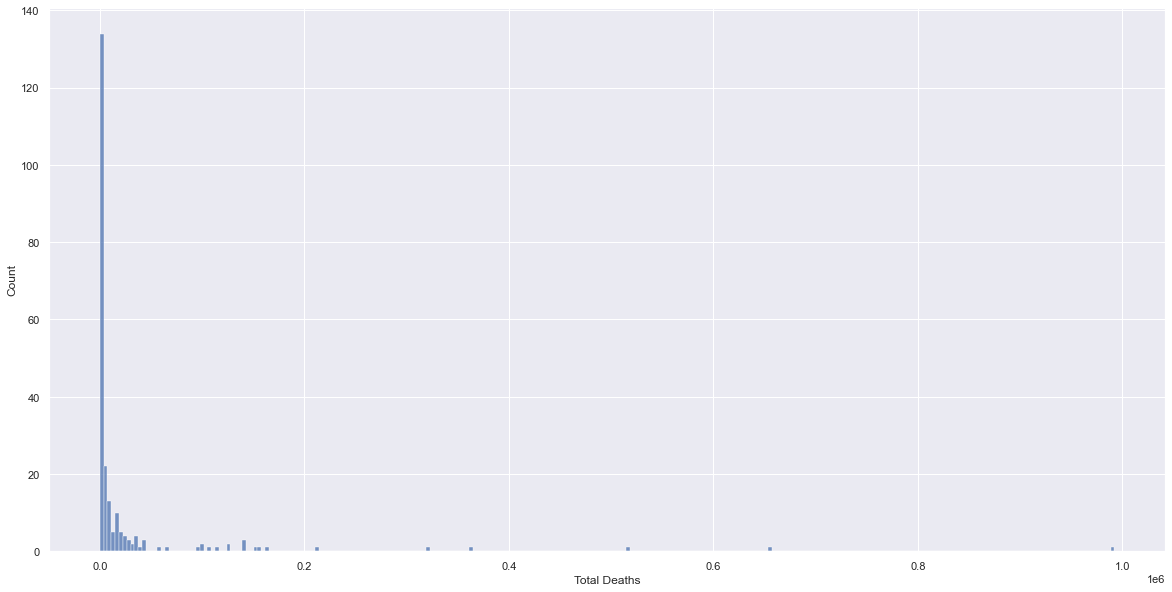

In [104]:
sns.histplot(data=data['Total Deaths'])

<AxesSubplot:xlabel='Total Cases', ylabel='Count'>

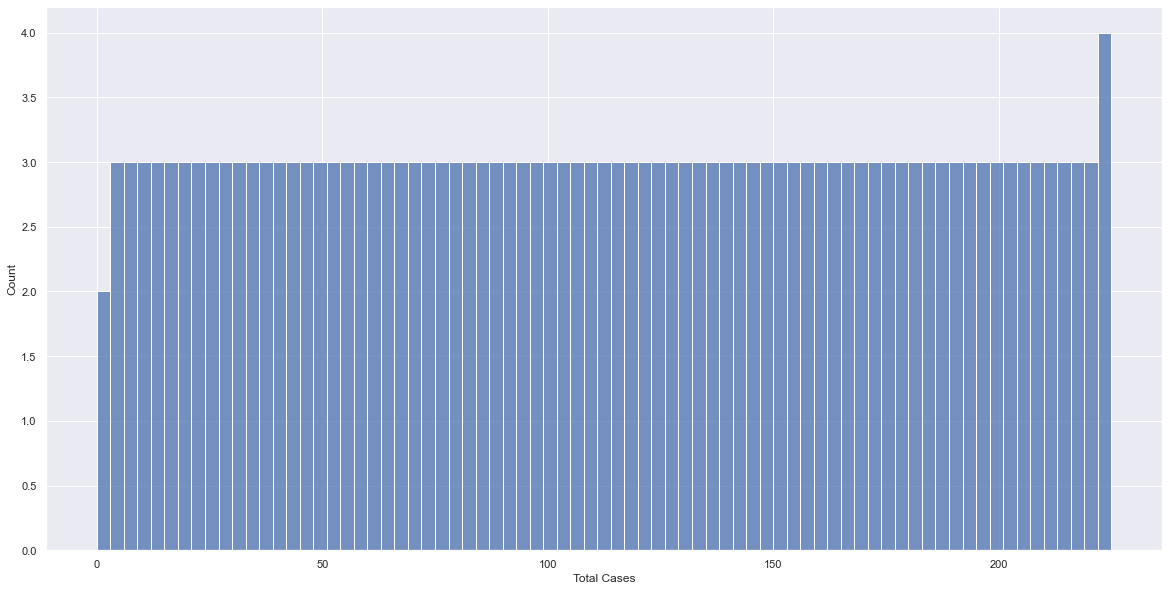